In [1]:
import sys
sys.path += ["../"]

import smbh
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

from mpl_toolkits.axes_grid1 import make_axes_locatable

COLOR_CYCLE = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
AXIS = np.genfromtxt("axis.txt", skip_header = 1, delimiter = ', ')[:30]
SPEEDS = np.genfromtxt("initial.txt", skip_header = 1, delimiter = ', ')

# Axis

In [3]:
is_, a_1, a_2, a_3 = AXIS.T

In [4]:
A_2, A_3 = np.meshgrid(a_2, a_3)

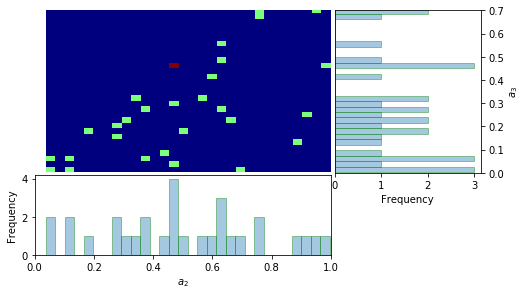

In [5]:
fig = plt.figure(figsize = (8, 4.5))

n_bins = 30
gs = GridSpec(3, 3)
gs.update(wspace = 0.025, hspace = 0.025) # set the spacing between axes. 

ax1 = plt.subplot(gs[:-1, :-1])
ax2 = plt.subplot(gs[-1, :-1])
ax3 = plt.subplot(gs[:-1, -1])

_ = ax1.hist2d(a_2, a_3, bins = n_bins, cmap = 'jet')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 0.7)

ax1.axis('off')

ax2.hist(a_2, bins = n_bins, edgecolor = 'g', alpha = 0.4)
ax2.set_xlim(0, 1)

ax3.hist(a_3, bins = n_bins, orientation = 'horizontal', edgecolor = 'g', alpha = 0.4)
ax3.set_ylim(0, 0.7)

ax3.set_ylabel('$a_3$')
ax2.set_xlabel('$a_2$')

ax2.set_ylabel('Frequency')
ax3.set_xlabel('Frequency')

ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")

fig.savefig('triaxial_axes.png', dpi = 300)

# Eccentricity and D

In [6]:
E = (1 - (a_3 / a_2) ** 2) ** 0.5

In [7]:
D = (a_1 ** 2 + a_2 ** 2 + a_3 ** 3) / 3

# Results

In [8]:
return_times = np.genfromtxt('return_times.txt')
return_masses = np.genfromtxt('return_masses.txt')
lyapunov = np.genfromtxt("lyapunov_exponents.txt")

# Speeds

In [9]:
def getR_Phi_Theta():
    global SPEEDS
    js_, rv_x, rv_y, rv_z = SPEEDS.T
    rv = (SPEEDS[:, 1:] ** 2).sum(axis = 1) ** 0.5
    phi = np.arctan2(rv_y, rv_x)
    theta = np.arccos(rv_z / rv)
    
    return rv, theta, phi

In [10]:
js_, rv_x, rv_y, rv_z = SPEEDS.T

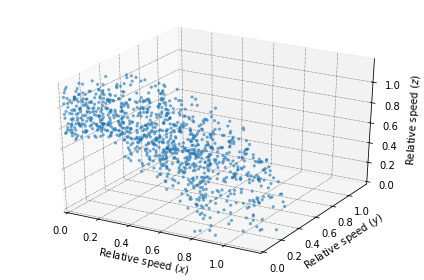

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(rv_x, rv_y, rv_z, alpha = 0.5, s = 5)

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_zlim(0, 1.2)

ax.set_xlabel("Relative speed ($x$)")
ax.set_ylabel("Relative speed ($y$)")
ax.set_zlabel("Relative speed ($z$)")

fig.tight_layout()

fig.savefig("3d_initial_speeds.png", dpi = 300)

plt.show()

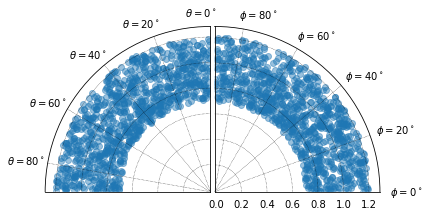

In [12]:
rv, theta, phi = getR_Phi_Theta()
fig, (ax1, ax2) = smbh.makePolarPlot(rv, theta, phi)

fig.savefig("polar_initial_speeds.png", dpi = 300)
plt.show()

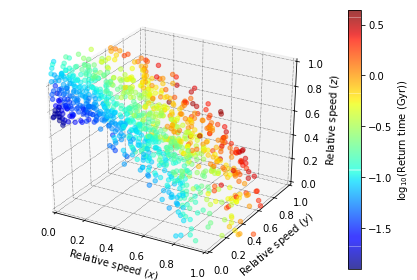

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

c = np.log10(return_times[3])

sc = ax.scatter(rv_x, rv_y, rv_z, c = c, alpha = 0.5, cmap = 'jet')

cb = plt.colorbar(sc)

cb.set_label('$\log_{10}($Return time (Gyr)$)$')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel("Relative speed ($x$)")
ax.set_ylabel("Relative speed ($y$)")
ax.set_zlabel("Relative speed ($z$)")

fig.tight_layout()

plt.show()

# Polars

In [14]:
def plotProperties(rv, theta, phi, index):
    global return_times, return_masses, lyapunov
    
    pos = return_masses[index] >= 1
    
    c1 = np.log10(return_times[index][pos] * 1000)
    c2 = return_masses[index][pos]
    c3 = lyapunov[index][pos] / 1e6
    
    a1 = fig1, (ax11, ax12) = smbh.makePolarPlot(rv[pos], theta[pos], phi[pos], colors = c1)  
    a2 = fig2, (ax21, ax22) = smbh.makePolarPlot(rv[pos], theta[pos], phi[pos], colors = c2)
    a3 = fig3, (ax31, ax32) = smbh.makePolarPlot(rv[pos], theta[pos], phi[pos], colors = c3)

    figs = fig1, fig2, fig3
    colors = c1, c2, c3
    
    labels = [r"$\log_{10}$ (Return times (Myr))", "Return masses ($10^5M_\odot$)", r"$\mathcal{L}$ (kyr$^{-1}$)"]
    for (fig, c, label) in zip(figs, colors, labels):
        sm = plt.cm.ScalarMappable(cmap = 'jet', norm = plt.Normalize(vmin = c.min(), vmax = c.max()))
        sm._A = []
        
        fig.subplots_adjust(bottom = 0.0)
        cbar_ax = fig.add_axes([0.17, 0.0, 0.7, 0.05])
        cb = fig.colorbar(sm, cax = cbar_ax, orientation = 'horizontal')
        cb.set_label(label)
        
    return a1, a2, a3

def savePlots(plots, name, labels = ['time', 'mass', 'lyapunov']):
    for (fig, _), l in zip(plots, labels):
        fig.savefig("%s_%s.png" % (name, l), dpi = 300, bbox_inches = 'tight', pad_inches = 0)

## Bigger eccentricity

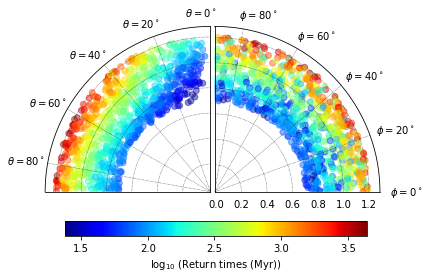

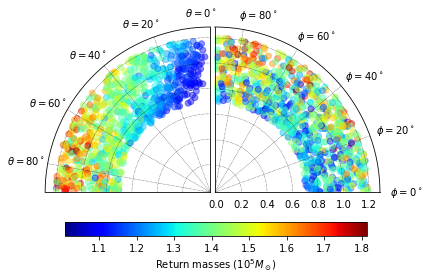

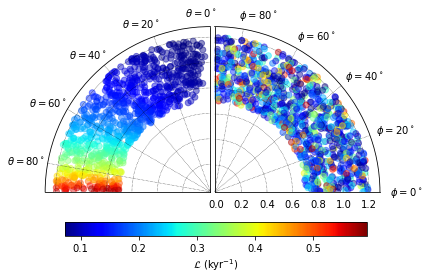

In [15]:
plots = a1, a2, a3 = plotProperties(rv, theta, phi, E.argmax())
savePlots(plots, 'biggerE')

## Smaller eccentricity

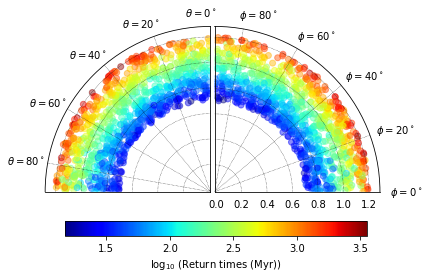

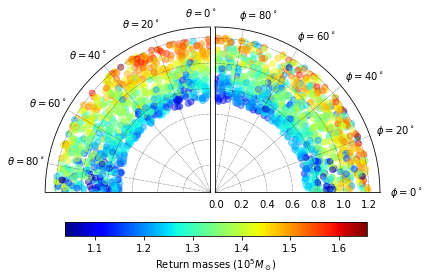

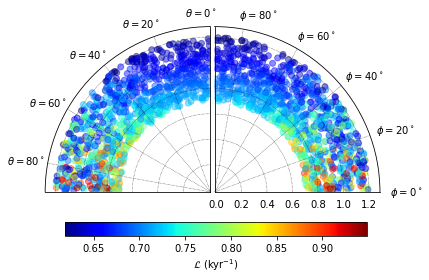

In [16]:
plots = a1, a2, a3 = plotProperties(rv, theta, phi, E.argmin())
savePlots(plots, 'smallerE')

## Bigger D

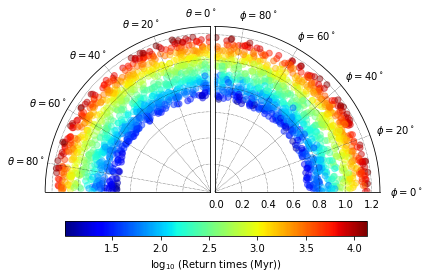

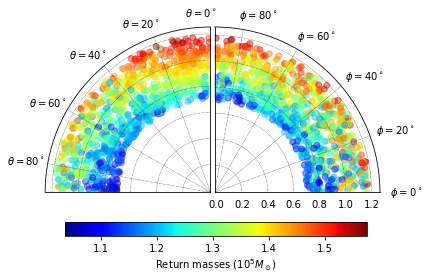

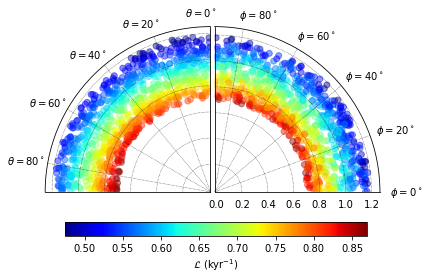

In [17]:
plots = a1, a2, a3 = plotProperties(rv, theta, phi, D.argmax())
savePlots(plots, 'biggerD')

## Smaller D

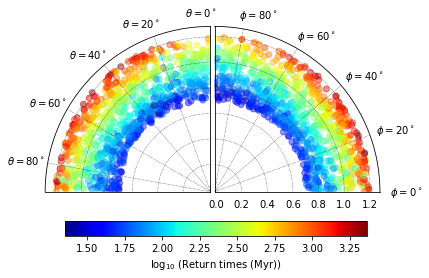

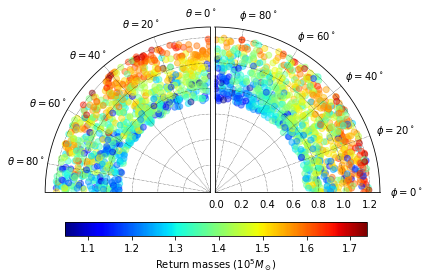

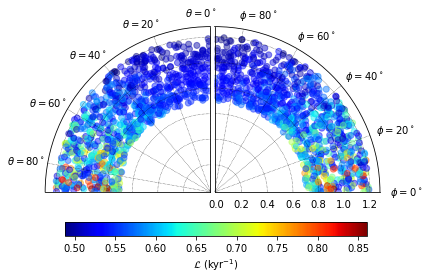

In [18]:
plots = a1, a2, a3 = plotProperties(rv, theta, phi, D.argsort()[1])
savePlots(plots, 'smallerD')

In [19]:
def getSpeedRings(pieces):
    global SPEEDS
    size = len(SPEEDS) // pieces
    vs = (SPEEDS[:, 1:] ** 2).sum(axis = 1) ** 0.5
    v_min = vs.min()
    v_max = vs.max()
    xs = np.linspace(v_min, v_max, pieces)
    dx = xs[1] - xs[0]
    xs = 0.5 * (xs[1:] + xs[:-1])
    
    pos = [np.where((vs >= i * dx + v_min) & (vs < (i + 1) * dx + v_min))[0] for i in range(pieces - 1)]
    return xs, pos
    
def subDivideData(data, pos):
    return [data[i] for i in pos]

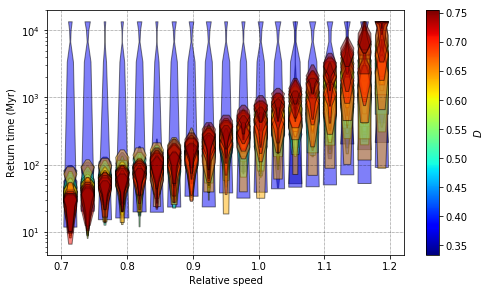

In [20]:
n = 30
pos = D.argsort()

colors = smbh.rgbToHex(smbh.getColors(n))

fig, ax = plt.subplots(figsize = (8, 4.5))

rings, p_rings = getSpeedRings(20)

for (i, p) in enumerate(pos[:: len(pos) // n]):
    ys = subDivideData(return_times[p] * 1000, p_rings)
    parts = ax.violinplot(ys, rings, showmeans = False, showextrema = False, widths = 0.02, points = 5)

    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
        
sm = plt.cm.ScalarMappable(cmap = 'jet', norm = plt.Normalize(vmin = D.min(), vmax = D.max()))
sm._A = []

cb = plt.colorbar(sm)
cb.set_label('$D$')

ax.set_yscale('log')
ax.set_xlabel('Relative speed')
ax.set_ylabel('Return time (Myr)')

ax.grid()

fig.savefig('all_return.png', dpi = 300)

plt.show()

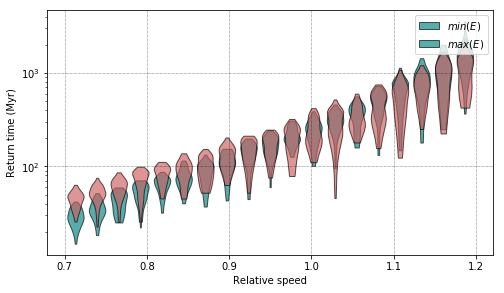

In [21]:
colors = ['#008080', '#CD5C5C']

fig, ax1 = plt.subplots(figsize = (8, 4.5))

rings, p_rings = getSpeedRings(20)

pos = [E.argmin(), D.argsort()[1]]

for (i, p) in enumerate(pos):
    ys = subDivideData(return_times[p] * 1000, p_rings)
    parts = ax1.violinplot(ys, rings, showmeans = False, showextrema = False, widths = 0.02, points = 15)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.65)

ax1.set_yscale('log')
        
ax1.set_xlabel('Relative speed')
ax1.set_ylabel('Return time (Myr)')

ax1.legend(['$min(E)$', '$max(E)$'])

ax1.grid()


plt.show()

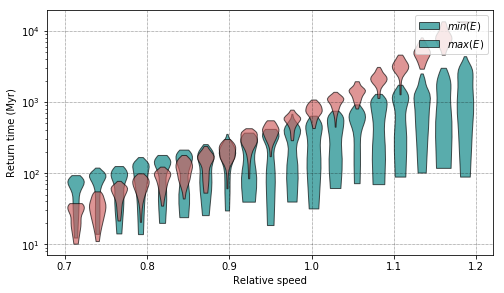

In [22]:
colors = ['#008080', '#CD5C5C']

fig, ax1 = plt.subplots(figsize = (8, 4.5))

rings, p_rings = getSpeedRings(20)

pos = [E.argmax(), D.argmax()]

for (i, p) in enumerate(pos):
    ys = subDivideData(return_times[p] * 1000, p_rings)
    parts = ax1.violinplot(ys, rings, showmeans = False, showextrema = False, widths = 0.02, points = 15)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.65)

ax1.set_yscale('log')
        
ax1.set_xlabel('Relative speed')
ax1.set_ylabel('Return time (Myr)')

ax1.legend(['$min(E)$', '$max(E)$'])

ax1.grid()
plt.show()

In [23]:
p = return_times[E.argmax(), p_rings[-2]]
p = np.log10(p * 1000)
freq, bins = np.histogram(p)
bins = 0.5 * (bins[1:] + bins[:-1])

<BarContainer object of 10 artists>

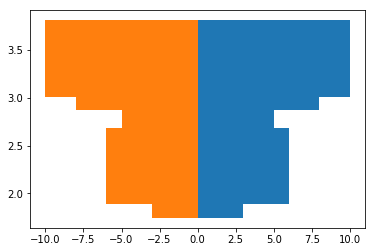

In [24]:
plt.barh(bins, freq)
plt.barh(bins, -freq)

# Global distributions

In [25]:
def gaussian(x, mu, std):
    v = std ** 2
    f = 1 / (2 * np.pi * v) ** 0.5
    exp = np.exp(- (x - mu) ** 2 / (2 * v))
    return f * exp

In [26]:
masses = return_masses.flatten()
m_max = 2
pos = (masses > 1) & (masses < m_max)

masses = masses[pos]

std = masses.std()
mu = masses.mean()

0.999947351795386


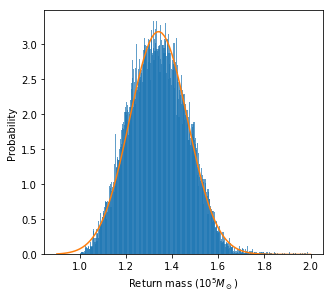

In [27]:
x = np.linspace(0.9, m_max, 100)
y = gaussian(x, mu, std)

fig, ax = plt.subplots(figsize = (5, 4.5))

freq, bins = np.histogram(masses, bins = 500, density = True)
bins = 0.5 * (bins[1:] + bins[:-1])

ax.bar(bins, freq, width = 0.005, alpha = 0.7)

ax.plot(x, y, c = COLOR_CYCLE[1])

ax.set_xlabel('Return mass ($10 ^ 5M_\odot$)')
ax.set_ylabel('Probability')

int_ = np.trapz(freq, dx = bins[1] - bins[0])
print(int_)

fig.savefig('dist_masses.png', dpi = 300)

plt.show()

In [28]:
def function(x, mu1, std1, mu2, std2, a, b):
    return a * gaussian(x, mu1, std1) + gaussian(x, mu2, std2) * b

In [29]:
times = return_times.flatten()
pos = times != times.max()

times = np.log10(1000 * times[pos])

freq, bins = np.histogram(times, bins = 500, density = True)

bins = 0.5 * (bins[1:] + bins[:-1])

popt, pcov = curve_fit(function, bins, freq, bounds = (([-np.inf] * 4 + [0] * 2), ([np.inf] * 4 + [1] * 2)))
mu1, std1, mu2, std2, a, b = popt

In [30]:
print('mu1: %f\nstd1: %f\nmu2: %f\nstd2: %f\na: %f\nb: %f' % tuple(popt) )

mu1: 2.593315
std1: 0.635886
mu2: 1.821181
std2: 0.237006
a: 0.758359
b: 0.251873


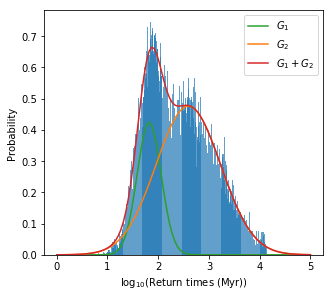

In [31]:
x = np.linspace(0, 5, 100)
y = function(x, *popt)

fig, ax = plt.subplots(figsize = (5, 4.5))

ax.bar(bins, freq, width = 0.01, alpha = 0.7)

y1 = a * gaussian(x, mu1, std1)
y2 = b * gaussian(x, mu2, std2)

ax.plot(x, y2, c = COLOR_CYCLE[2], label= '$G_1$')
ax.plot(x, y1, c = COLOR_CYCLE[1], label = '$G_2$')
ax.plot(x, y, c = COLOR_CYCLE[3], label = '$G_1 + G_2$')

ax.set_xlabel(r'$\log_{10}$(Return times (Myr))')
ax.set_ylabel('Probability')

ax.legend()

fig.savefig('dist_times.png', dpi = 300)

plt.show()